In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,RidgeClassifierCV,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB

In [2]:
train = pd.read_csv('spaceship/spaceship-titanic/train.csv')
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
pd.concat([train,train['Cabin'].str.split('/', expand= True, ).rename(columns = {0:'cabin0',1:'cabin1',2:'cabin2'})],axis=1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,cabin0,cabin1,cabin2
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


In [4]:
pd.concat([train,train['PassengerId'].str.split('_', expand= True, ).rename(columns = {0:'gggg',1:'pp'})],axis=1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,gggg,pp
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01


In [5]:
train.isna().sum()/len(train)

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [6]:
train.Transported.mean()

0.5036236051995858

In [7]:
train.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


<AxesSubplot:>

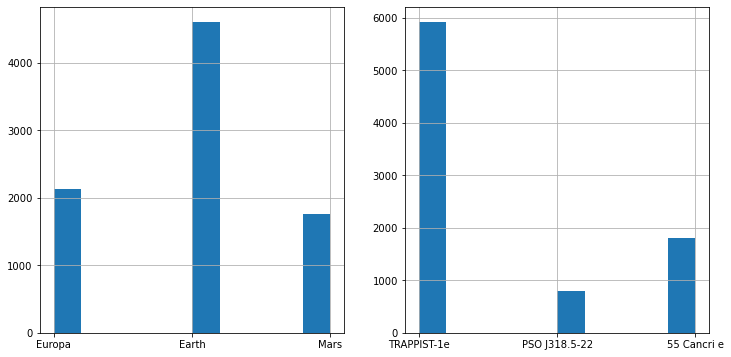

In [8]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
train.HomePlanet.hist()
plt.subplot(1,2,2)
train.Destination.hist()


Text(0.5, 1.0, 'VRDeck')

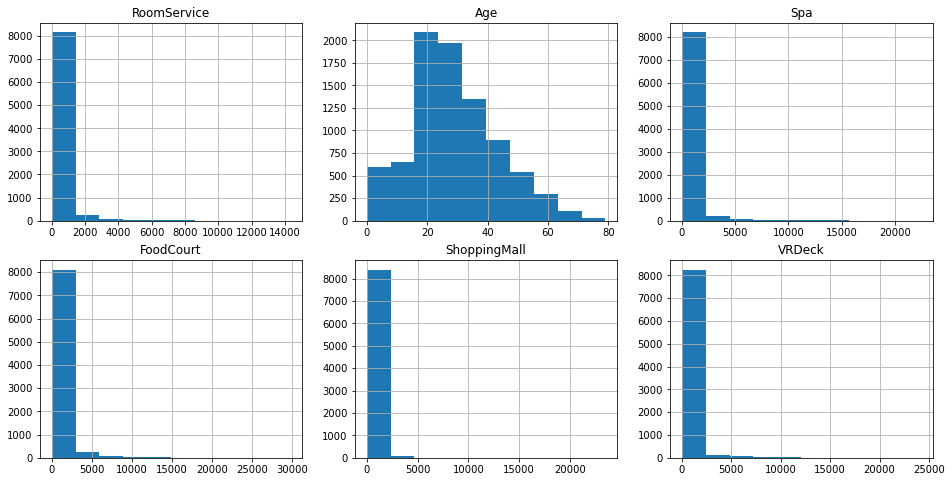

In [9]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
train['RoomService'].hist()
plt.title('RoomService')
plt.subplot(2,3,2)
train['Age'].hist()
plt.title('Age')
plt.subplot(2,3,3)
train['Spa'].hist()
plt.title('Spa')
plt.subplot(2,3,4)
train['FoodCourt'].hist()
plt.title('FoodCourt')
plt.subplot(2,3,5)
train['ShoppingMall'].hist()
plt.title('ShoppingMall')
plt.subplot(2,3,6)
train['VRDeck'].hist()
plt.title('VRDeck')

In [10]:
train['RoomService'].quantile(0.95)

1274.249999999999

In [11]:
def prepare_data(data = train):
    # fillna_values for num vars
    data['Age'] = data['Age'].fillna(train['Age'].median())
    data['RoomService'] = data['RoomService'].fillna(data['RoomService'].median())
    data[data['RoomService'] >= data['RoomService'].quantile(0.95)]['RoomService'] = data['RoomService'].quantile(0.95)
    data['Spa'] = data['Spa'].fillna(train['Spa'].median())
    data[data['Spa'] >= data['Spa'].quantile(0.95)]['Spa'] = data['Spa'].quantile(0.95)
    data['FoodCourt'] = data['FoodCourt'].fillna(train['FoodCourt'].median())
    data[data['FoodCourt'] >= data['FoodCourt'].quantile(0.95)]['FoodCourt'] = data['FoodCourt'].quantile(0.95)
    data['ShoppingMall'] = data['ShoppingMall'].fillna(train['ShoppingMall'].median())
    data[data['ShoppingMall'] >= data['ShoppingMall'].quantile(0.95)]['ShoppingMall'] = data['ShoppingMall'].quantile(0.95)
    data['VRDeck'] = data['VRDeck'].fillna(train['VRDeck'].median())
    data[data['VRDeck'] >= data['VRDeck'].quantile(0.95)]['VRDeck'] = data['VRDeck'].quantile(0.95)
    #cabin modification
    data = pd.concat([data,data['Cabin'].str.split('/', expand= True, ).rename(columns = {0:'cabin0',1:'cabin1',2:'cabin2'})],axis=1)
    data = pd.concat([data,data['PassengerId'].str.split('_', expand= True, ).rename(columns = {0:'gggg',1:'pp'})],axis=1)
    data['cabin0'] = data['cabin0'].fillna(data['cabin0'].mode()[0]) #data['cabin0'].mode()[0]
    data['cabin2'] = data['cabin2'].fillna(data['cabin2'].mode()[0]) #data['cabin2'].mode()[0]
    data['cabin1'] = data['cabin1'].fillna(data['cabin1'].median()) 
    #fillna_values for cat vars.
    data['Destination'] = data['Destination'].fillna(train['Destination'].mode()[0])
    data['HomePlanet'] = data['HomePlanet'].fillna('empty') #train['HomePlanet'].mode()[0]
    data['CryoSleep'] = np.where(data['CryoSleep'] == True,1,0)
    data['VIP'] = np.where(data['VIP'] == True,1,0)
    try:
        data['Transported'] = np.where(data['Transported'] == True,1,0)
    except:
        print('no dep value')
    
    data.drop(['Cabin','Name','VIP','Destination','cabin0'], axis=1 , inplace = True)
    data = pd.get_dummies(data, columns=['HomePlanet','cabin2'])
    
    #data.drop(['cabin0_T','cabin0_D','cabin0_A'], axis=1 , inplace = True)
    return data

In [12]:
data = prepare_data()

<ipython-input-11-141eba293fc9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data['RoomService'] >= data['RoomService'].quantile(0.95)]['RoomService'] = data['RoomService'].quantile(0.95)
<ipython-input-11-141eba293fc9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data['Spa'] >= data['Spa'].quantile(0.95)]['Spa'] = data['Spa'].quantile(0.95)
<ipython-input-11-141eba293fc9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [13]:
data

,PassengerId,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabin1,gggg,pp,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_empty,cabin2_P,cabin2_S
0,0001_01,0,39.0,0.0,0.0,0.0,0.0,0.0,0,0,0001,01,0,1,0,0,1,0
1,0002_01,0,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0002,01,1,0,0,0,0,1
2,0003_01,0,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,0003,01,0,1,0,0,0,1
3,0003_02,0,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,0003,02,0,1,0,0,0,1
4,0004_01,0,16.0,303.0,70.0,151.0,565.0,2.0,1,1,0004,01,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,41.0,0.0,6819.0,0.0,1643.0,74.0,0,98,9276,01,0,1,0,0,1,0
8689,9278_01,1,18.0,0.0,0.0,0.0,0.0,0.0,0,1499,9278,01,1,0,0,0,0,1
8690,9279_01,0,26.0,0.0,0.0,1872.0,1.0,0.0,1,1500,9279,01,1,0,0,0,0,1
8691,9280_01,0,32.0,0.0,1049.0,0.0,353.0,3235.0,0,608,9280,01,0,1,0,0,0,1


In [14]:
np.random.choice(train.Name,10)

array(['Tonioe Waltonnedy', 'Halesh Pette', 'Judya Wooterston',
       'Jeron Munozanson', 'Fanna Navages', 'Ralda Flynnis',
       'Wezna Unkepery', 'Propsh Hontichre', 'Yogal Fisty',
       'Allena Sullones'], dtype=object)

<AxesSubplot:>

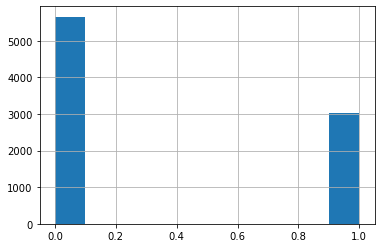

In [15]:
data.CryoSleep.hist()

In [16]:
data.isna().sum()

PassengerId          0
CryoSleep            0
Age                  0
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Transported          0
cabin1               0
gggg                 0
pp                   0
HomePlanet_Earth     0
HomePlanet_Europa    0
HomePlanet_Mars      0
HomePlanet_empty     0
cabin2_P             0
cabin2_S             0
dtype: int64

In [17]:
data.shape

(8693, 18)

In [18]:
test = pd.read_csv('spaceship/spaceship-titanic/test.csv')
test.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers


In [19]:
logistic_model = LogisticRegression(penalty = 'l1', max_iter=10000)

In [20]:
train_X, test_X , train_y, test_y = train_test_split(data.drop(['PassengerId','Transported'],axis =1), data[['Transported']], test_size = 0.2 )

In [21]:
sc = StandardScaler()

train_X_sc = sc.fit_transform(train_X)
test_X_sc = sc.transform(test_X)

In [22]:
grid = GridSearchCV(estimator= logistic_model,
                   param_grid= {
                                   'C':[0.001,0.01,0.1,1,5,10,50,100,500,1000],
                                   'solver':['newton-cg','lbfgs','liblinear','sag','saga']
                   },
                   cv = 5,
                   n_jobs= 5,
                   verbose = 1).fit(train_X_sc, train_y)

model = grid.best_estimator_
model

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=5)]: Done 250 out of 250 | elapsed:    8.5s finished
C:\Users\tevfikcan.ozay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=100, max_iter=10000, penalty='l1', solver='liblinear')

In [23]:
pred = model.predict(train_X_sc)
pred_t = model.predict(test_X_sc)
acc = accuracy_score(train_y,pred)
acc_t = accuracy_score(test_y,pred_t)
print(f'train model acc is {acc*100}%')
print(f'test model acc is {acc_t*100}%')

train model acc is 79.26373310324992%
test model acc is 80.04600345025878%


In [24]:
rfc = RandomForestClassifier()

In [25]:
grid = GridSearchCV(estimator= rfc,
                   param_grid= {
                                   'n_estimators':[300,500,1000,1500],
                                   'criterion':['gini','entropy','liblinear','log_loss'],
                                   'max_depth':[1,2,3,4,5,6]
                       
                   },
                   cv = 5,
                   n_jobs= 5,
                   verbose = 1).fit(train_X, train_y)

model2 = grid.best_estimator_
model2

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   34.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  3.6min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  5.8min
[Parallel(n_jobs=5)]: Done 480 out of 480 | elapsed:  6.0min finished
C:\Users\tevfikcan.ozay\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestClassifier(max_depth=6, n_estimators=500)

In [26]:
pred = model2.predict(train_X)
pred_t = model2.predict(test_X)
acc = accuracy_score(train_y,pred)
acc_t = accuracy_score(test_y,pred_t)
print(f'train model acc is {acc*100}%')
print(f'test model acc is {acc_t*100}%')

train model acc is 81.1044003451251%
test model acc is 80.16101207590569%


In [27]:
model2.feature_importances_

array([0.22715207, 0.02476226, 0.14856878, 0.08341826, 0.06939845,
       0.15632268, 0.12113543, 0.02633607, 0.01965532, 0.003894  ,
       0.0550711 , 0.03560338, 0.01338328, 0.00091928, 0.00753145,
       0.00684818])

In [28]:
pd.DataFrame(list(zip(data.drop(['PassengerId','Transported'],axis=1).columns,model2.feature_importances_))).sort_values(1, ascending = False)

,0,1
0,CryoSleep,0.227152
5,Spa,0.156323
2,RoomService,0.148569
6,VRDeck,0.121135
3,FoodCourt,0.083418
4,ShoppingMall,0.069398
10,HomePlanet_Earth,0.055071
11,HomePlanet_Europa,0.035603
7,cabin1,0.026336
1,Age,0.024762


In [29]:
'''
 loss='deviance',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    init=None,
    random_state=None,
    max_features=None,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    presort='deprecated',
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
'''

"\n loss='deviance',\n    learning_rate=0.1,\n    n_estimators=100,\n    subsample=1.0,\n    criterion='friedman_mse',\n    min_samples_split=2,\n    min_samples_leaf=1,\n    min_weight_fraction_leaf=0.0,\n    max_depth=3,\n    min_impurity_decrease=0.0,\n    min_impurity_split=None,\n    init=None,\n    random_state=None,\n    max_features=None,\n    verbose=0,\n    max_leaf_nodes=None,\n    warm_start=False,\n    presort='deprecated',\n    validation_fraction=0.1,\n    n_iter_no_change=None,\n    tol=0.0001,\n    ccp_alpha=0.0,\n"

In [30]:
gb  = GradientBoostingClassifier()

In [ ]:
grid = GridSearchCV(estimator= gb,
                   param_grid= {
                                   'learning_rate':[0.001,0.05,0.01,0.5,0.1],
                                   'n_estimators':[500,1000,1500],
                                   'subsample':[0.9,1.0],
                                   'loss':['deviance', 'exponential'],
                                   'max_features':[3,4,5,6]
                   },
                   cv = 5,
                   n_jobs= 5,
                   verbose = 1).fit(train_X, train_y)

model3 = grid.best_estimator_
model3

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   48.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  4.5min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed: 10.7min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed: 40.2min


In [ ]:
pred = model3.predict(train_X)
pred_t = model3.predict(test_X)
acc = accuracy_score(train_y,pred)
acc_t = accuracy_score(test_y,pred_t)
print(f'train model acc is {acc*100}%')
print(f'test model acc is {acc_t*100}%')

In [ ]:
test_data = prepare_data(data= test)
test_data

In [ ]:
%pwd

In [ ]:
%cd spaceship/

In [ ]:
%pwd

In [ ]:
sample = pd.read_csv('spaceship-titanic/sample_submission.csv')
sample

In [ ]:
test_sc = sc.transform(test_data.drop(['PassengerId'],axis=1))
test_sc

In [ ]:
pred2 = np.where(model2.predict(test_data.drop(['PassengerId'],axis=1)) == 0, 'False', 'True')
pred3 = np.where(model3.predict(test_data.drop(['PassengerId'],axis=1)) == 0, 'False', 'True')
pred = np.where(model.predict(test_sc) == 0, 'False', 'True')
pred

In [ ]:
sample['Transported'] = pred

In [ ]:
sample.to_csv('lgmodel_cv_std_eda.csv', index = False)

In [ ]:
sample['Transported'] = pred2

In [ ]:
sample.to_csv('rfmodel_cv_std_eda.csv', index = False)

In [ ]:
sample['Transported'] = pred3

In [ ]:
sample.to_csv('gbmodel_cv_std_eda.csv', index = False)